In [1]:
include("helpers_SCWOptimization.jl")

┌ Warning: interpolate(A, BSpline(Linear()), OnGrid()) is deprecated, use interpolate(A, BSpline(Linear()))
│   caller = dice_interpolate(::Array{Float64,1}, ::Int64) at helpers.jl:61
└ @ Main C:\Users\Kevin\Documents\GitHub\DICEFARM\src_annualized\helpers.jl:61
┌ Warning: `getindex(itp::AbstractInterpolation{T, N}, i::Vararg{ExpandedIndexTypes, N}) where {T, N}` is deprecated, use `itp(i...)` instead.
│   caller = dice_interpolate(::Array{Float64,1}, ::Int64) at helpers.jl:67
└ @ Main C:\Users\Kevin\Documents\GitHub\DICEFARM\src_annualized\helpers.jl:67


ByAnimals_outcome (generic function with 2 methods)

In [4]:
function ByAnimal_outcome(x)
	m 	= create_AnimalWelfareOpt()
	set_param!(m, :farm, :BeefReduc, x[1])
	set_param!(m, :farm, :PoultryReduc, x[2])
	set_param!(m, :farm, :PorkReduc, x[3])
	run(m)
	return m[:welfare, :UTILITY]
end

ByAnimal_outcome (generic function with 1 method)

In [ ]:
include("SCW_Analysis.jl")

┌ Warning: interpolate(A, BSpline(Linear()), OnGrid()) is deprecated, use interpolate(A, BSpline(Linear()))
│   caller = dice_interpolate(::Array{Float64,1}, ::Int64) at helpers.jl:61
└ @ Main C:\Users\Kevin\Documents\GitHub\DICEFARM\src_annualized\helpers.jl:61


Ran once


┌ Warning: `getindex(itp::AbstractInterpolation{T, N}, i::Vararg{ExpandedIndexTypes, N}) where {T, N}` is deprecated, use `itp(i...)` instead.
│   caller = dice_interpolate(::Array{Float64,1}, ::Int64) at helpers.jl:67
└ @ Main C:\Users\Kevin\Documents\GitHub\DICEFARM\src_annualized\helpers.jl:67


Costs of Non-Veg in Baseline are [161337.33936651584, 135183.23981900452, 112568.80542986425, 92753.52036199094, 75197.80090497738, 59498.01357466063, 45344.9592760181, 32497.69230769231, 20764.615384615383, 9991.746606334842, 53.42986425339367, -9154.199095022625, -17717.45701357466, -25708.904977375565, -33190.407239819004, -40214.515837104074, -46826.74208144796, -53066.20814479638, -58966.88687782805, -64559.05882352941][2]
Costs of Beef in Baseline are 54.52488687782805
Costs of Pork in Baseline are 31.739819004524886
Costs of Poultry in Baseline are 314.99095022624437


┌ Warning: interpolate(A, BSpline(Linear()), OnGrid()) is deprecated, use interpolate(A, BSpline(Linear()))
│   caller = dice_interpolate(::Array{Float64,1}, ::Int64) at helpers.jl:61
└ @ Main C:\Users\Kevin\Documents\GitHub\DICEFARM\src_annualized\helpers.jl:61


Optimal Vegetarian Share is [0.711730957010077]

┌ Warning: `getindex(itp::AbstractInterpolation{T, N}, i::Vararg{ExpandedIndexTypes, N}) where {T, N}` is deprecated, use `itp(i...)` instead.
│   caller = dice_interpolate(::Array{Float64,1}, ::Int64) at helpers.jl:67
└ @ Main C:\Users\Kevin\Documents\GitHub\DICEFARM\src_annualized\helpers.jl:67


In [49]:
plot3d(uAs, alphas, )

MethodError: MethodError: Cannot `convert` an object of type Array{Float64,1} to an object of type Float64
Closest candidates are:
  convert(::Type{Float64}, !Matched::DoubleFloats.DoubleFloat{Float64}) at C:\Users\Kevin\.julia\packages\DoubleFloats\kS0UB\src\type\convert.jl:9
  convert(::Type{T}, !Matched::DoubleFloats.DoubleFloat{DoubleFloats.DoubleFloat{T}}) where T<:Union{Float16, Float32, Float64} at C:\Users\Kevin\.julia\packages\DoubleFloats\kS0UB\src\type\convert.jl:37
  convert(::Type{T}, !Matched::Ratios.SimpleRatio{S}) where {T<:AbstractFloat, S} at C:\Users\Kevin\.julia\packages\Ratios\iJ67w\src\Ratios.jl:16
  ...

In [52]:
veg_outcome(.2, 1., .004)

132943.19316425573

In [55]:
alphas 	= collect(.002: .001: .008)
uAs 	= collect(.9:.1:1.9)

DiffOpts = zeros(length(uAs), length(alphas))
Suffering = 1.
alpha = .004
	function optveg(x, grad)
		if length(grad)>0
		grad[1] = 1000
		end
    	result = veg_outcome(x[1], Suffering, alpha)
		return result
	end

	opt = Opt(:LN_SBPLX, 1)
	opt.lower_bounds=[0.]
	opt.upper_bounds=[.9999999999]
	init = [.5]
	opt.xtol_rel = 1e-4
	opt.max_objective = optveg
	sol = optimize(opt, init)[2]

1-element Array{Float64,1}:
 0.711730957010077

In [58]:
x = ones(2)
x[1] = sol[1]

0.711730957010077

In [46]:
include("AnimalWelfareModel.jl")	
tempM = create_AnimalWelfare()
	set_param!(tempM, :welfare, :elasmu, .8)
    set_param!(tempM, :neteconomy, :CEQ, 0)
	run(tempM)
	TempBaseWelfare = tempM[:welfare, :UTILITY]
	BeefPulse = copy(OrigBeef)
	PorkPulse = copy(OrigPork)
	PoultryPulse = copy(OrigPoultry)

	MargCons = create_AnimalWelfare()
	set_param!(MargCons, :welfare, :elasmu, .8)
	set_param!(MargCons, :neteconomy, :CEQ, 1e-9)
	run(MargCons)
	tempSCNumeraire = TempBaseWelfare - MargCons[:welfare, :UTILITY]

	BeefPulse[6] = OrigBeef[6] + 1000*1.1*(4.8) 				#Add pulse to year 2020; pump up for Veg diets
	PorkPulse[6] = OrigPork[6]  + 1000*1.1*(2.7)
	PoultryPulse[6] = OrigPoultry[6] + 1000*1.1*(6.7)

	VegPulse = create_AnimalWelfare()
	set_param!(VegPulse, :welfare, :elasmu, .8)
	set_param!(VegPulse, :farm, :Beef, BeefPulse)
	set_param!(VegPulse, :farm, :Poultry, PoultryPulse)
	set_param!(VegPulse, :farm, :Pork, PorkPulse)
	run(VegPulse)
	VegWelfare = VegPulse[:welfare, :UTILITY]
	BenefitOfVegetarianEta = (TempBaseWelfare - VegWelfare)/tempSCNumeraire

┌ Warning: interpolate(A, BSpline(Linear()), OnGrid()) is deprecated, use interpolate(A, BSpline(Linear()))
│   caller = dice_interpolate(::Array{Float64,1}, ::Int64) at helpers.jl:61
└ @ Main C:\Users\Kevin\Documents\GitHub\DICEFARM\src_annualized\helpers.jl:61
┌ Warning: `getindex(itp::AbstractInterpolation{T, N}, i::Vararg{ExpandedIndexTypes, N}) where {T, N}` is deprecated, use `itp(i...)` instead.
│   caller = dice_interpolate(::Array{Float64,1}, ::Int64) at helpers.jl:67
└ @ Main C:\Users\Kevin\Documents\GitHub\DICEFARM\src_annualized\helpers.jl:67


17676.376383763836

In [26]:
tempSCNumeraire

1.3096723705530167e-10

In [28]:
VegWelfare

1762.4342737543284

In [29]:
TempBaseWelfare

-32444.45589645549

In [40]:
explore(VegPulse)

Electron.Window(Application(Base.PipeEndpoint(Base.Libc.WindowsRawSocket(0x00000000000005b4) open, 0 bytes waiting), Process(`'C:\Users\Kevin\.julia\packages\Electron\aRIgh\src\..\deps\electron\electron.exe' 'C:\Users\Kevin\.julia\packages\Electron\aRIgh\src\main.js' '\\.\pipe\juliaelectron-12196-1' '\\.\pipe\juliaelectron-sysnotify-12196-1' qmg39AZrYaphFY8hWwRDHR+Qj53mdVspx2ykFy7zNgsOyn6G1KblnRRBjfPF2q3DF2zS9U5840f0gnrERuKpfeD0/d9uXRFCs3vvTjNOM65UalMdk+BRgDMdfWssKgX/XtBHpvcY6kxf2YOZACEtUulWI69AJRLJiGf+fsFCjf4=`, ProcessRunning), [1 window]), 3, true, Channel{Any}(sz_max:128,sz_curr:0))

In [32]:
explore(MargCons)

Electron.Window(Application(Base.PipeEndpoint(Base.Libc.WindowsRawSocket(0x00000000000005b4) open, 0 bytes waiting), Process(`'C:\Users\Kevin\.julia\packages\Electron\aRIgh\src\..\deps\electron\electron.exe' 'C:\Users\Kevin\.julia\packages\Electron\aRIgh\src\main.js' '\\.\pipe\juliaelectron-12196-1' '\\.\pipe\juliaelectron-sysnotify-12196-1' qmg39AZrYaphFY8hWwRDHR+Qj53mdVspx2ykFy7zNgsOyn6G1KblnRRBjfPF2q3DF2zS9U5840f0gnrERuKpfeD0/d9uXRFCs3vvTjNOM65UalMdk+BRgDMdfWssKgX/XtBHpvcY6kxf2YOZACEtUulWI69AJRLJiGf+fsFCjf4=`, ProcessRunning), [2 windows]), 2, true, Channel{Any}(sz_max:128,sz_curr:0))

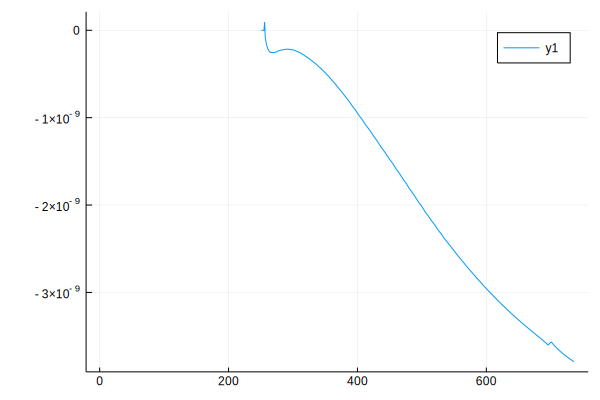

In [39]:
Diff = VegPulse[:welfare, :CPC] - MargCons[:welfare, :CPC]
plot(Diff)